## MOD1_Project_scratchpad_v3



In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#import sales data
sales_data = pd.read_csv('EXTR_RPSale.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#import data on property
res_info = pd.read_csv('EXTR_ResBldg.csv')

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Inspect sales data

In [4]:
#what does the data contain?
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB


In [5]:
#data preview
sales_data.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,1235111,2704079,2584094,1056831
Major,138860,664885,423943,403700,951120
Minor,110,40,50,715,900
DocumentDate,08/21/2014,07/09/1991,10/11/2014,01/04/2013,04/20/1989
SalePrice,245000,0,0,0,85000
RecordingNbr,20140828001436,199203161090,20141205000558,20130110000910,198904260448
Volume,,071,,,117
Page,,001,,,053
PlatNbr,,664885,,,951120
PlatType,,C,,,P


In [6]:
#remove columns with too many missing values and will not be relevant in a regression model
#keep 'SaleReason' for reference purposes only
sales_data = sales_data[['Major', 'Minor', 'DocumentDate', 'SalePrice', 'SaleReason']]

In [7]:
#preview trimmed data
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SaleReason
0,138860,110,08/21/2014,245000,1
1,664885,40,07/09/1991,0,18
2,423943,50,10/11/2014,0,18
3,403700,715,01/04/2013,0,11
4,951120,900,04/20/1989,85000,1


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 5 columns):
Major           object
Minor           object
DocumentDate    object
SalePrice       int64
SaleReason      int64
dtypes: int64(2), object(3)
memory usage: 77.6+ MB


In [9]:
#go through same process with building info data
res_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                 512548 non-null int64
Minor                 512548 non-null int64
BldgNbr               512548 non-null int64
NbrLivingUnits        512548 non-null int64
Address               512548 non-null object
BuildingNumber        512548 non-null object
Fraction              512548 non-null object
DirectionPrefix       511984 non-null object
StreetName            512548 non-null object
StreetType            512548 non-null object
DirectionSuffix       511984 non-null object
ZipCode               468452 non-null object
Stories               512548 non-null float64
BldgGrade             512548 non-null int64
BldgGradeVar          512548 non-null int64
SqFt1stFloor          512548 non-null int64
SqFtHalfFloor         512548 non-null int64
SqFt2ndFloor          512548 non-null int64
SqFtUpperFloor        512548 non-null int64
SqFtUnfinFull         512548 non-null int64

In [10]:
res_info.head().T

,0,1,2,3,4
Major,520,640,640,660,720
Minor,67,7,16,96,13
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,6781 MARS AVE S 98108,45216 196TH AVE SE 98022,20410 SE 456TH WAY 98022,8501 S 259TH ST 98030,84 LOGAN AVE S 98055
BuildingNumber,6781,45216,20410,8501,84
Fraction,,,,,
DirectionPrefix,,,SE,S,
StreetName,MARS,196TH,456TH,259TH,LOGAN
StreetType,AVE,AVE,WAY,ST,AVE


In [11]:
#res_info.describe().T

In [12]:
#remove columns with too many missing values and will not be relevant in a regression model
#first pass
res_info = res_info[['Major', 'Minor', 'NbrLivingUnits', 'ZipCode', 'BldgGrade', 
                       'Stories','SqFt1stFloor','SqFtHalfFloor','SqFt2ndFloor',
                     'SqFtUpperFloor','SqFtTotLiving', 'SqFtTotBasement',
                     'Bedrooms', 'BathHalfCount', 'Bath3qtrCount','BathFullCount',
                     'YrBuilt', 'YrRenovated', 'Condition']]

In [13]:
#consolidate squarefeet columns into area above ground and add total bathroom counts
res_info['BathCountSum'] = (res_info.BathFullCount + res_info.BathHalfCount*0.5 + 
                             res_info.Bath3qtrCount*0.75)
res_info['SqFtAboveGround'] = (res_info.SqFt1stFloor + res_info.SqFt2ndFloor + 
                               res_info.SqFtHalfFloor + res_info.SqFtUpperFloor)

In [14]:
#drop columns
res_info = res_info.drop(['SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor','SqFtUpperFloor',
                         'BathFullCount', 'BathHalfCount', 'Bath3qtrCount'], axis=1)

In [15]:
#preview consolidated data
res_info.head().T

,0,1,2,3,4
Major,520,640,640,660,720
Minor,67,7,16,96,13
NbrLivingUnits,1,1,1,1,1
ZipCode,98108,98022,98022,98030,98055
BldgGrade,7,6,9,7,6
Stories,1,2,2,1.5,1.5
SqFtTotLiving,2360,1770,2720,1360,1270
SqFtTotBasement,920,0,0,950,420
Bedrooms,3,3,3,4,3
YrBuilt,1940,1961,2004,1933,1924


In [16]:
#merge two data sets into one using inner join with major and minor columns
#need to cast Major and Minor Columns into numbers before merging
sales_data['Major'] = pd.to_numeric(sales_data['Major'], errors='coerce')
sales_data['Minor'] = pd.to_numeric(sales_data['Minor'], errors='coerce')

In [17]:
#merge two data sets
kc_data = pd.merge(sales_data, res_info, on=['Major', 'Minor'])

In [18]:
#preview merged data
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451791 entries, 0 to 1451790
Data columns (total 17 columns):
Major              1451791 non-null float64
Minor              1451791 non-null float64
DocumentDate       1451791 non-null object
SalePrice          1451791 non-null int64
SaleReason         1451791 non-null int64
NbrLivingUnits     1451791 non-null int64
ZipCode            1333409 non-null object
BldgGrade          1451791 non-null int64
Stories            1451791 non-null float64
SqFtTotLiving      1451791 non-null int64
SqFtTotBasement    1451791 non-null int64
Bedrooms           1451791 non-null int64
YrBuilt            1451791 non-null int64
YrRenovated        1451791 non-null int64
Condition          1451791 non-null int64
BathCountSum       1451791 non-null float64
SqFtAboveGround    1451791 non-null int64
dtypes: float64(4), int64(11), object(2)
memory usage: 199.4+ MB


In [19]:
kc_data.head().T

,0,1,2,3,4
Major,138860,138860,138860,138860,423943
Minor,110,110,110,110,50
DocumentDate,08/21/2014,06/12/1989,01/16/2005,06/08/2005,10/11/2014
SalePrice,245000,109300,14684,0,0
SaleReason,1,1,14,5,18
NbrLivingUnits,1,1,1,1,1
ZipCode,98002,98002,98002,98002,98092
BldgGrade,7,7,7,7,6
Stories,1,1,1,1,1
SqFtTotLiving,1490,1490,1490,1490,960


### clean data based on assumption and availability

In [20]:
#convert date to timestamp to better utilize data (long wait time expected)
kc_data['Date'] = kc_data['DocumentDate'].apply(pd.Timestamp)

In [21]:
kc_data['Year'] = kc_data['Date'].apply(lambda ts: ts.year)

In [22]:
kc_data = kc_data.drop(['DocumentDate'], axis=1)

In [23]:
#look at housing prices vs year
year_groupby = kc_data.groupby('Year')
year_groupby.describe()['SalePrice']

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
1900,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
1934,1.0,125000.000000,NaN,125000.0,125000.0,125000.0,125000.00,125000.0
1951,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
1953,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
1954,2.0,300.000000,4.242641e+02,0.0,150.0,300.0,450.00,600.0
1955,3.0,3166.666667,5.484828e+03,0.0,0.0,0.0,4750.00,9500.0
1957,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
1958,1.0,0.000000,NaN,0.0,0.0,0.0,0.00,0.0
1959,2.0,6125.000000,8.662058e+03,0.0,3062.5,6125.0,9187.50,12250.0


In [24]:
#remove years with low data and outlier year 2021, keep year range between 1982-2019
kc_data = kc_data.loc[kc_data['Year']>1981]
kc_data = kc_data.loc[kc_data['Year']<2020]

In [25]:
kc_data.shape

(1450912, 18)

In [26]:
#visualize price changes over the years with boxplot (excluding outliers)
#kc_data.boxplot(column='SalePrice', by='Year', figsize=(12,6), showfliers=True)

In [27]:
#significant outliers exists, on both ends, requires removal, remove 0s and extreme high values
kc_data = kc_data.loc[kc_data['SalePrice']>0]
kc_data = kc_data.loc[kc_data['SalePrice']<5000000]

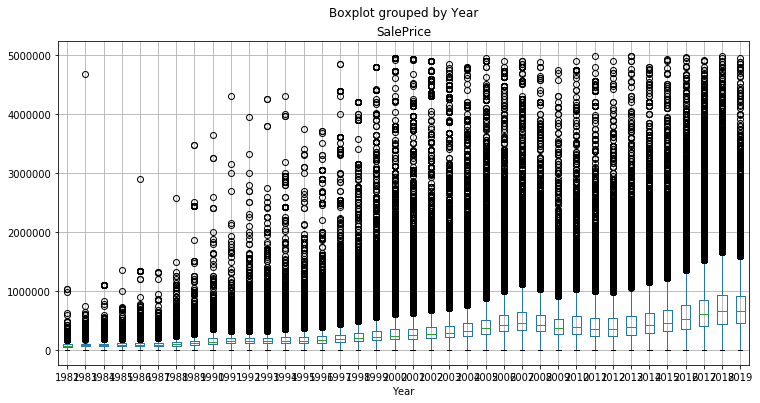

In [28]:
kc_data.boxplot(column='SalePrice', by='Year', figsize=(12,6), showfliers=True)

In [29]:
#remove sale prices higher than 1,000,000 to accommodate for non-luxury home buyers
kc_data = kc_data.loc[kc_data['SalePrice']<1000000]

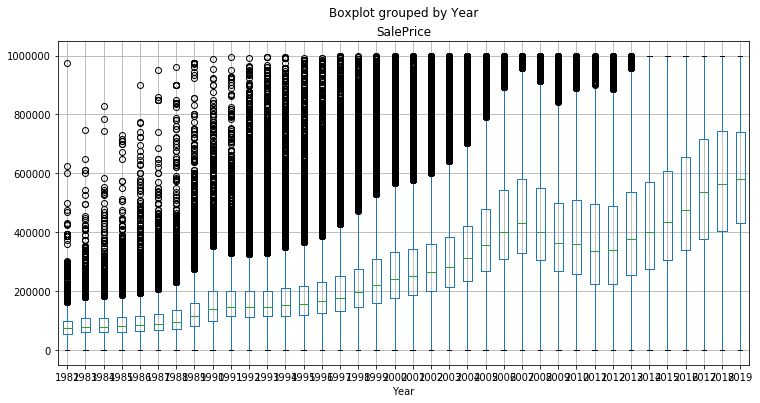

In [30]:
kc_data.boxplot(column='SalePrice', by='Year', figsize=(12,6), showfliers=True)

In [31]:
#remove low sale prices, census data
kc_data = kc_data.loc[kc_data['SalePrice']>20000]

In [32]:
#remove properties with building grade codes 1-4, which does not meet code
#reference https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r
kc_data = kc_data.loc[kc_data['BldgGrade']>4]
kc_data = kc_data.loc[kc_data['BldgGrade']<20]

In [33]:
kc_data.BldgGrade.value_counts()

7     376356
8     250892
9     104560
6      90134
10     41085
5      11964
11     11550
12      2390
13       278
Name: BldgGrade, dtype: int64

In [34]:
kc_data.describe()

,Major,Minor,SalePrice,SaleReason,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,SqFtTotBasement,Bedrooms,YrBuilt,YrRenovated,Condition,BathCountSum,SqFtAboveGround,Year
count,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000,889209.000000
mean,452800.578717,1492.949975,327417.186251,2.003275,1.018929,7.594937,1.479421,2069.785567,461.906464,3.380186,1971.700471,91.370966,3.425832,2.130084,1787.978128,2003.273943
std,287162.948601,2764.453103,209900.026656,3.433078,0.159900,1.120646,0.508345,880.700307,569.321197,0.926427,29.149504,417.300601,0.645666,0.763489,811.617054,8.815224
min,40.000000,1.000000,10005.000000,0.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1894.000000,0.000000,1.000000,0.000000,0.000000,1982.000000
25%,206110.000000,119.000000,166000.000000,1.000000,1.000000,7.000000,1.000000,1440.000000,0.000000,3.000000,1952.000000,0.000000,3.000000,1.750000,1200.000000,1997.000000
50%,387676.000000,325.000000,277000.000000,1.000000,1.000000,7.000000,1.500000,1930.000000,0.000000,3.000000,1977.000000,0.000000,3.000000,2.250000,1572.000000,2003.000000
75%,727710.000000,971.000000,437000.000000,1.000000,1.000000,8.000000,2.000000,2540.000000,940.000000,4.000000,1996.000000,0.000000,4.000000,2.500000,2230.000000,2011.000000
max,990600.000000,9692.000000,999999.000000,19.000000,11.000000,13.000000,4.000000,21650.000000,10490.000000,37.000000,2019.000000,2019.000000,5.000000,34.000000,20560.000000,2019.000000


In [35]:
#remove SqFtTot less than 500,
kc_data = kc_data.loc[kc_data['SqFtTotLiving']>500]

In [103]:
#remove SqFtTot more than than 5000
kc_data = kc_data.loc[kc_data['SqFtTotLiving']<5001]

In [104]:
kc_data.describe()

,Major,Minor,SalePrice,SaleReason,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,Bedrooms,YrBuilt,YrRenovated,Condition,BathCountSum,SqFtAboveGround,Year,Renovation,PptyAge
count,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000
mean,453528.345816,1476.204793,326355.601372,2.000047,1.018467,7.575596,1.476537,2043.661085,3.376091,1971.530800,90.379962,3.428509,2.114894,1767.555883,2003.293488,0.045258,44.860771
std,287216.211314,2743.862228,208830.316630,3.428398,0.154193,1.083223,0.507347,805.635100,0.888066,29.090079,415.126025,0.646469,0.718825,758.812786,8.818162,0.207871,28.467962
min,40.000000,1.000000,10005.000000,0.000000,1.000000,5.000000,1.000000,504.000000,1.000000,1894.000000,0.000000,1.000000,0.750000,200.000000,1982.000000,0.000000,0.000000
25%,207850.000000,117.000000,165900.000000,1.000000,1.000000,7.000000,1.000000,1440.000000,3.000000,1952.000000,0.000000,3.000000,1.750000,1200.000000,1997.000000,0.000000,22.000000
50%,388380.000000,322.000000,276000.000000,1.000000,1.000000,7.000000,1.500000,1920.000000,3.000000,1977.000000,0.000000,3.000000,2.250000,1570.000000,2003.000000,0.000000,40.000000
75%,728390.000000,965.000000,435000.000000,1.000000,1.000000,8.000000,2.000000,2520.000000,4.000000,1995.000000,0.000000,4.000000,2.500000,2210.000000,2011.000000,0.000000,64.000000
max,990600.000000,9692.000000,999999.000000,19.000000,4.000000,13.000000,4.000000,5000.000000,10.000000,2019.000000,2019.000000,5.000000,5.000000,5680.000000,2019.000000,1.000000,125.000000


In [37]:
#remove values bathrooms value less than 0.5, unlikely to be a house or outlier
kc_data = kc_data.loc[kc_data['BathCountSum'] > 0.5]

In [85]:
#remove values bathrooms value more than 5 as outlier
kc_data = kc_data.loc[kc_data['BathCountSum'] <= 5]

In [105]:
kc_data.shape

(879062, 19)

In [39]:
#remove bedroom values less than 1, unlikely to be house
kc_data = kc_data.loc[kc_data['Bedrooms'] >= 1]

In [80]:
#remove bedroom values more than 10 as outliers
kc_data = kc_data.loc[kc_data['Bedrooms'] < 11]

In [106]:
kc_data.shape

(879062, 19)

In [107]:
kc_data.describe()

,Major,Minor,SalePrice,SaleReason,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,Bedrooms,YrBuilt,YrRenovated,Condition,BathCountSum,SqFtAboveGround,Year,Renovation,PptyAge
count,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000,879062.000000
mean,453528.345816,1476.204793,326355.601372,2.000047,1.018467,7.575596,1.476537,2043.661085,3.376091,1971.530800,90.379962,3.428509,2.114894,1767.555883,2003.293488,0.045258,44.860771
std,287216.211314,2743.862228,208830.316630,3.428398,0.154193,1.083223,0.507347,805.635100,0.888066,29.090079,415.126025,0.646469,0.718825,758.812786,8.818162,0.207871,28.467962
min,40.000000,1.000000,10005.000000,0.000000,1.000000,5.000000,1.000000,504.000000,1.000000,1894.000000,0.000000,1.000000,0.750000,200.000000,1982.000000,0.000000,0.000000
25%,207850.000000,117.000000,165900.000000,1.000000,1.000000,7.000000,1.000000,1440.000000,3.000000,1952.000000,0.000000,3.000000,1.750000,1200.000000,1997.000000,0.000000,22.000000
50%,388380.000000,322.000000,276000.000000,1.000000,1.000000,7.000000,1.500000,1920.000000,3.000000,1977.000000,0.000000,3.000000,2.250000,1570.000000,2003.000000,0.000000,40.000000
75%,728390.000000,965.000000,435000.000000,1.000000,1.000000,8.000000,2.000000,2520.000000,4.000000,1995.000000,0.000000,4.000000,2.500000,2210.000000,2011.000000,0.000000,64.000000
max,990600.000000,9692.000000,999999.000000,19.000000,4.000000,13.000000,4.000000,5000.000000,10.000000,2019.000000,2019.000000,5.000000,5.000000,5680.000000,2019.000000,1.000000,125.000000


In [42]:
#basement values mostly 0, remove column
kc_data = kc_data.drop(['SqFtTotBasement'], axis=1)

In [43]:
kc_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Major,886278.0,452954.692761,287193.824129,40.00,206190.00,387681.00,727870.0,990600.0
Minor,886278.0,1489.923612,2761.300626,1.00,118.00,325.00,970.0,9692.0
SalePrice,886278.0,327554.074325,209860.479367,10005.00,166000.00,277000.00,437400.0,999999.0
SaleReason,886278.0,2.001467,3.430057,0.00,1.00,1.00,1.0,19.0
NbrLivingUnits,886278.0,1.018943,0.159987,1.00,1.00,1.00,1.0,11.0
BldgGrade,886278.0,7.599662,1.117074,5.00,7.00,7.00,8.0,13.0
Stories,886278.0,1.480277,0.508274,1.00,1.00,1.50,2.0,4.0
SqFtTotLiving,886278.0,2073.994206,877.779395,504.00,1450.00,1930.00,2540.0,21650.0
Bedrooms,886278.0,3.389065,0.913932,1.00,3.00,3.00,4.0,37.0
YrBuilt,886278.0,1971.713404,29.120914,1894.00,1952.00,1977.00,1996.0,2019.0


In [44]:
#backup data
kc_data_backup = kc_data.copy()

In [49]:
kc_data['Renovation'] = kc_data['YrRenovated'].apply(lambda x: 1 if x > 0 else 0)

In [72]:
#calculate effective age based on year built or renovations
kc_data['PptyAge'] = ((2019-kc_data.YrRenovated)*((kc_data.Renovation+1)//2) + 
                      (2019-kc_data.YrBuilt)*((kc_data.Renovation+1)%2))

In [83]:
kc_data.describe()

,Major,Minor,SalePrice,SaleReason,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,Bedrooms,YrBuilt,YrRenovated,Condition,BathCountSum,SqFtAboveGround,Year,Renovation,PptyAge
count,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000,886167.000000
mean,452959.983307,1489.824727,327544.775563,2.001411,1.018750,7.599545,1.480231,2073.384086,3.387611,1971.713457,91.101777,3.426541,2.133525,1790.806859,2003.273068,0.045618,44.667013
std,287193.519427,2761.192037,209851.948488,3.429944,0.155923,1.116970,0.508263,874.280729,0.900229,29.119351,416.711509,0.645686,0.751550,807.027014,8.814431,0.208655,28.487736
min,40.000000,1.000000,10005.000000,0.000000,1.000000,5.000000,1.000000,504.000000,1.000000,1894.000000,0.000000,1.000000,0.750000,200.000000,1982.000000,0.000000,0.000000
25%,206200.000000,118.000000,166000.000000,1.000000,1.000000,7.000000,1.000000,1450.000000,3.000000,1952.000000,0.000000,3.000000,1.750000,1200.000000,1997.000000,0.000000,21.000000
50%,387681.000000,325.000000,277000.000000,1.000000,1.000000,7.000000,1.500000,1930.000000,3.000000,1977.000000,0.000000,3.000000,2.250000,1580.000000,2003.000000,0.000000,40.000000
75%,727870.000000,970.000000,437185.000000,1.000000,1.000000,8.000000,2.000000,2540.000000,4.000000,1996.000000,0.000000,4.000000,2.500000,2240.000000,2011.000000,0.000000,64.000000
max,990600.000000,9692.000000,999999.000000,19.000000,4.000000,13.000000,4.000000,20760.000000,10.000000,2019.000000,2019.000000,5.000000,18.250000,20560.000000,2019.000000,1.000000,125.000000


In [78]:
#backup data//
kc_data_backup = kc_data.copy()

In [121]:
kc_data = kc_data_backup.copy()

In [122]:
#eliminate columns not intended to be used as features
kc_data = kc_data[['SalePrice', 'NbrLivingUnits', 'BldgGrade', 'Stories', 'SqFtTotLiving', 
                   'Bedrooms', 'BathCountSum','SqFtAboveGround','Condition', 'Renovation',
                   'PptyAge']]

In [123]:
kc_data.head().T

,0,1,2,6,7
SalePrice,245000.0,109300.0,14684.0,96000.0,127500.0
NbrLivingUnits,1.0,1.0,1.0,1.0,1.0
BldgGrade,7.0,7.0,7.0,6.0,6.0
Stories,1.0,1.0,1.0,1.0,1.0
SqFtTotLiving,1490.0,1490.0,1490.0,960.0,960.0
Bedrooms,3.0,3.0,3.0,3.0,3.0
BathCountSum,2.0,2.0,2.0,1.0,1.0
SqFtAboveGround,1490.0,1490.0,1490.0,960.0,960.0
Condition,3.0,3.0,3.0,4.0,4.0
Renovation,0.0,0.0,0.0,0.0,0.0


In [124]:
#examine correlation matrix
kc_data.corr()

,SalePrice,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,Bedrooms,BathCountSum,SqFtAboveGround,Condition,Renovation,PptyAge
SalePrice,1.000000,0.000497,0.420170,0.275485,0.374663,0.188587,0.325242,0.344381,-0.010075,0.026544,-0.185839
NbrLivingUnits,0.000497,1.000000,-0.054104,0.002819,0.058219,0.172931,0.120433,0.029448,-0.020470,0.022161,0.093055
BldgGrade,0.420170,-0.054104,1.000000,0.483252,0.740524,0.353660,0.626707,0.738088,-0.174533,-0.008828,-0.473073
Stories,0.275485,0.002819,0.483252,1.000000,0.412527,0.223380,0.498135,0.585456,-0.271466,0.007497,-0.480275
SqFtTotLiving,0.374663,0.058219,0.740524,0.412527,1.000000,0.593935,0.752022,0.869322,-0.094896,0.052412,-0.374415
Bedrooms,0.188587,0.172931,0.353660,0.223380,0.593935,1.000000,0.560816,0.486541,0.000317,0.015446,-0.202405
BathCountSum,0.325242,0.120433,0.626707,0.498135,0.752022,0.560816,1.000000,0.670673,-0.135599,0.041079,-0.534515
SqFtAboveGround,0.344381,0.029448,0.738088,0.585456,0.869322,0.486541,0.670673,1.000000,-0.178624,0.021521,-0.457163
Condition,-0.010075,-0.020470,-0.174533,-0.271466,-0.094896,0.000317,-0.135599,-0.178624,1.000000,-0.078495,0.386434
Renovation,0.026544,0.022161,-0.008828,0.007497,0.052412,0.015446,0.041079,0.021521,-0.078495,1.000000,-0.174496


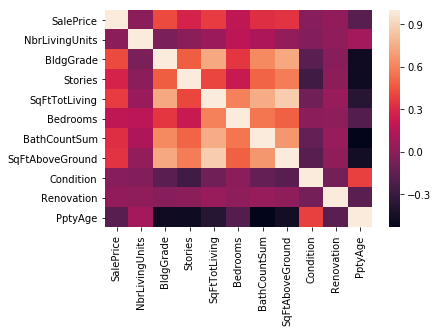

In [125]:
sns.heatmap(kc_data.corr())

In [133]:
#separate features and dependant variable
kc_data_features = kc_data.drop(['SalePrice'], axis=1)
kc_saleprice = kc_data['SalePrice']

In [134]:
#examine features correlation
kc_data_features.corr()

,NbrLivingUnits,BldgGrade,Stories,SqFtTotLiving,Bedrooms,BathCountSum,SqFtAboveGround,Condition,Renovation,PptyAge
NbrLivingUnits,1.000000,-0.054104,0.002819,0.058219,0.172931,0.120433,0.029448,-0.020470,0.022161,0.093055
BldgGrade,-0.054104,1.000000,0.483252,0.740524,0.353660,0.626707,0.738088,-0.174533,-0.008828,-0.473073
Stories,0.002819,0.483252,1.000000,0.412527,0.223380,0.498135,0.585456,-0.271466,0.007497,-0.480275
SqFtTotLiving,0.058219,0.740524,0.412527,1.000000,0.593935,0.752022,0.869322,-0.094896,0.052412,-0.374415
Bedrooms,0.172931,0.353660,0.223380,0.593935,1.000000,0.560816,0.486541,0.000317,0.015446,-0.202405
BathCountSum,0.120433,0.626707,0.498135,0.752022,0.560816,1.000000,0.670673,-0.135599,0.041079,-0.534515
SqFtAboveGround,0.029448,0.738088,0.585456,0.869322,0.486541,0.670673,1.000000,-0.178624,0.021521,-0.457163
Condition,-0.020470,-0.174533,-0.271466,-0.094896,0.000317,-0.135599,-0.178624,1.000000,-0.078495,0.386434
Renovation,0.022161,-0.008828,0.007497,0.052412,0.015446,0.041079,0.021521,-0.078495,1.000000,-0.174496
PptyAge,0.093055,-0.473073,-0.480275,-0.374415,-0.202405,-0.534515,-0.457163,0.386434,-0.174496,1.000000


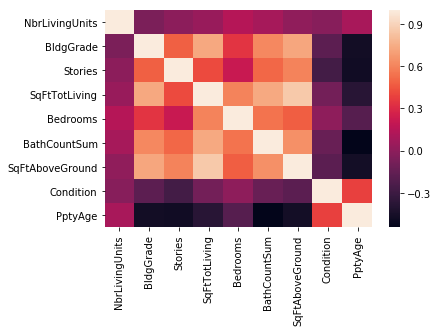

In [119]:
sns.heatmap(kc_data_features.corr())

In [135]:
#remove nbrlivingunits and condition due to very low correlation with sale price
kc_data_features = kc_data_features.drop(['NbrLivingUnits', 'Condition'], axis=1)

In [136]:
x = kc_data_features
y = kc_saleprice

In [137]:
predictors_int = sm.add_constant(x)
model = sm.OLS(y,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                 2.740e+04
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        21:43:42   Log-Likelihood:            -1.2020e+07
No. Observations:              886278   AIC:                         2.404e+07
Df Residuals:                  886269   BIC:                         2.404e+07
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.732e+05   2178.426   -125.403      0.000   -2.77e+05   -2.69e+05
BldgGrade         5.89e+04    294.141    200.234      0.000    5.83e+04    5.95e+04
Stories          5.429e+04    541.068    100.343      0.000    5.32e+04    5.54e+04
SqFtTotLiving      49.8574      0.613     81.275      0.000      48.655      51.060
Bedrooms        -4858.1245    284.915    -17.051      0.000   -5416.549   -4299.700
BathCountSum     1.158e+04    468.903     24.704      0.000    1.07e+04    1.25e+04
SqFtAboveGround   -34.6321      0.599    -57.822      0.000     -35.806     -33.458
Renovation       3.058e+04    986.249     31.003      0.000    2.86e+04    3.25e+04
PptyAge           486.8919      9.242     52.682      0.000     468.778     505.006
==============================================================================
Omnibus:                    66832.522   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            85665.648
Skew:                           0.687   Prob(JB):                         0.00
Kurtosis:                       3.656   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""